# 4. Spatio-temporal diversity of SOIL 

In [1]:
!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/soil

In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/soil'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/soil


In [4]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [6]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance


from qiime2.plugins import diversity as q2d

%matplotlib inline

In [7]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

# Diversity 

In [8]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qza')

depth of 5000: Retained 220’000 (30.45%) features in 44 (80.00%) samples

still use because also lowering to 1000 only keeps 83 % of samples

In [9]:
Visualization.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qzv')

<visualization: Visualization uuid: 90e5e561-bacc-4db9-885c-7fad52b1a9dc>

In [10]:
# just use the same rarefaction depth for all sample types
depth = 5000 
threads = 5

In [11]:
core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='soil_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/util/_warning.py:60: UserWarning: observed_otus is deprecated as of 0.6.0.
  warn(f"{func.__name__} is deprecated as of {ver}.")


In [12]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 9220f0a5-9e95-4317-b770-8af420bbbff3>

In [13]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: 35e17824-d445-4475-b7bf-f4ecc336cf9d>

## Kmerizer 

In [41]:
#!rm -r soil_kmer_cm5000

In [14]:
%%bash

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_rep_seqs.qza

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir soil_kmer_cm5000/

Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: soil_kmer_cm5000/rarefied_table.qza
Saved FeatureTable[Frequency] to: soil_kmer_cm5000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: soil_kmer_cm5000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: soil_kmer_cm5000/shannon_vector.qza
Saved DistanceMatrix to: soil_kmer_cm5000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: soil_kmer_cm5000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: soil_kmer_cm5000/jaccard_pcoa_results.qza
Saved PCoAResults to: soil_kmer_cm5000/bray_curtis_pcoa_results.qza
Saved Visualization to: soil_kmer_cm5000/scatterplot.qzv


In [15]:
Visualization.load('soil_kmer_cm5000/scatterplot.qzv')

<visualization: Visualization uuid: b979af92-5193-460e-9b8e-2ac68fe6b83a>

### Alpha Group Significance 

In [16]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

In [17]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: 820e1fdb-783a-4603-933e-b4296a111938>

In [18]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: f6b1942a-9a13-4c62-8631-e26e23d0bf79>

In [19]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: 92e5c520-6f9c-4d8b-b2b7-65eb624673fc>

### PERMANOVA

In [20]:
formula = 'Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'soil_kmer_cm5000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmp117hviiz/dm.tsv /scratch/lfloerl/tmpdata/tmp117hviiz/md.tsv Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-fa_4d3id/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmp5jydue7j/dm.tsv /scratch/lfloerl/tmpdata/tmp5jydue7j/md.tsv Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-eozjfv6y/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: soil_kmer_cm5000/adonis_bray_curtis.qzv
Saved Visualization to: soil_kmer_cm5000/adonis_jaccard.qzv


In [21]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 48ea8d6a-1a07-455f-bdec-bc8f92221912>

In [22]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 9f3585c8-58f9-4595-bf3d-35f21f04940e>

In [23]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: d6c77298-3f0f-4a17-a498-f6cdfd5c2796>

In [24]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: f519dd6e-7e2c-4df6-ae03-d8a04f070a27>

## Mantel 

> the geodisic distance matrix was create with q2-coordinates in a qiime2021.1 environment locally 

In [40]:
import sys
sys.path.append('/home/lfloerl/microterroir/Microbiome/Other_scripts/')
from mantel_ITS import mantel_test_and_plot

geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

In [36]:
%%bash 

div_dir='soil_cm5000'
kmer_dir='soil_kmer_cm5000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported soil_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_cm5000/bray_curtis_distance_matrix
Exported soil_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_cm5000/jaccard_distance_matrix
Exported soil_kmer_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_kmer_cm5000/bray_curtis_distance_matrix
Exported soil_kmer_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_kmer_cm5000/jaccard_distance_matrix


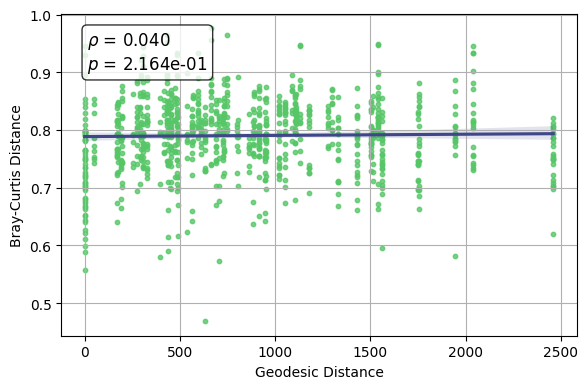

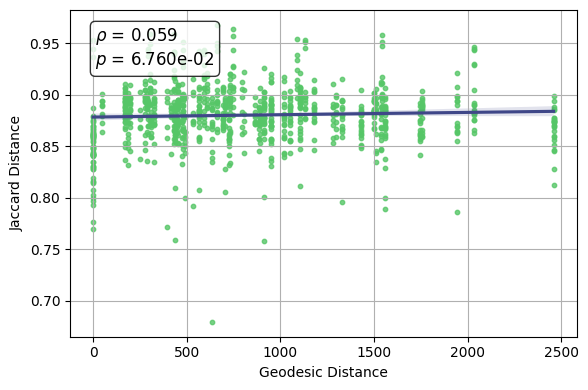

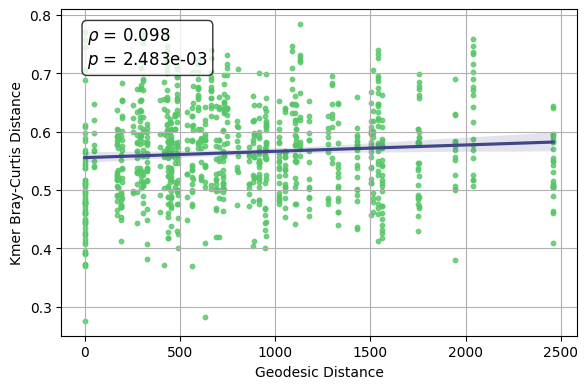

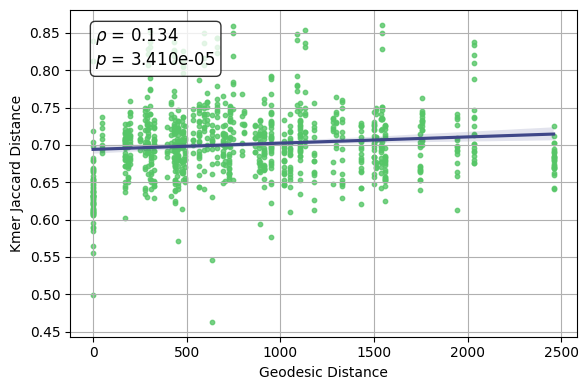

In [41]:
div_dir='soil_cm5000'
kmer_dir='soil_kmer_cm5000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [42]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.040228,0.216401
1,Jaccard,0.059448,0.067601
2,Kmer Bray-Curtis,0.098255,0.002483
3,Kmer Jaccard,0.134306,0.000034


<hr>

# SUBSET TO SINGLE TIMEPOINT 

# Diversity 

In [49]:
%%bash 

# subset to only harvest samples before fitting 
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
  --p-where "[Collection_ID]='Veraison_2021'" \
  --o-filtered-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_table.qza

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_rep_seqs.qza

Saved FeatureTable[Frequency] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_table.qza
Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_rep_seqs.qza


In [43]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='soil_veraison21_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

## Kmerizer 

In [44]:
!rm -r soil_veraison21_kmer_cm5000/

rm: das Entfernen von 'soil_veraison21_kmer_cm5000/' ist nicht möglich: No such file or directory


In [45]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_veraison21_filtered_table.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir soil_veraison21_kmer_cm5000/

Saved FeatureTable[Frequency] to: soil_veraison21_kmer_cm5000/rarefied_table.qza
Saved FeatureTable[Frequency] to: soil_veraison21_kmer_cm5000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: soil_veraison21_kmer_cm5000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: soil_veraison21_kmer_cm5000/shannon_vector.qza
Saved DistanceMatrix to: soil_veraison21_kmer_cm5000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: soil_veraison21_kmer_cm5000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: soil_veraison21_kmer_cm5000/jaccard_pcoa_results.qza
Saved PCoAResults to: soil_veraison21_kmer_cm5000/bray_curtis_pcoa_results.qza
Saved Visualization to: soil_veraison21_kmer_cm5000/scatterplot.qzv


## Mantel 

In [40]:
import sys
sys.path.append('/home/lfloerl/microterroir/Microbiome/ITS/spatio-temporal/')
from mantel_ITS import mantel_test_and_plot

geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

In [46]:
%%bash 

div_dir='soil_veraison21_cm5000'
kmer_dir='soil_veraison21_kmer_cm5000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported soil_veraison21_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_veraison21_cm5000/bray_curtis_distance_matrix
Exported soil_veraison21_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_veraison21_cm5000/jaccard_distance_matrix
Exported soil_veraison21_kmer_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_veraison21_kmer_cm5000/bray_curtis_distance_matrix
Exported soil_veraison21_kmer_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_veraison21_kmer_cm5000/jaccard_distance_matrix


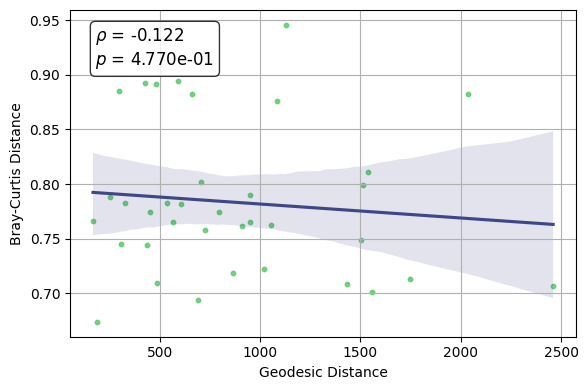

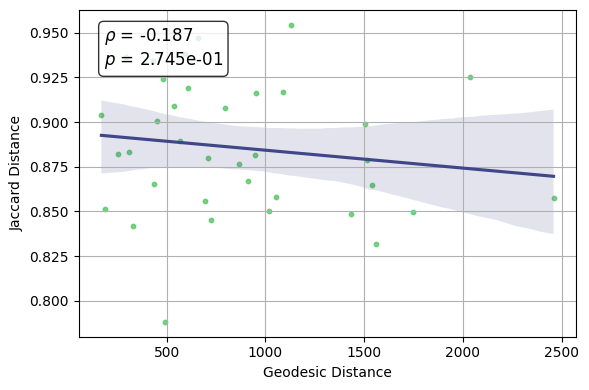

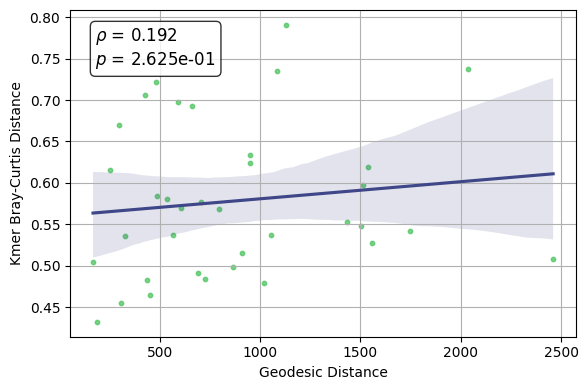

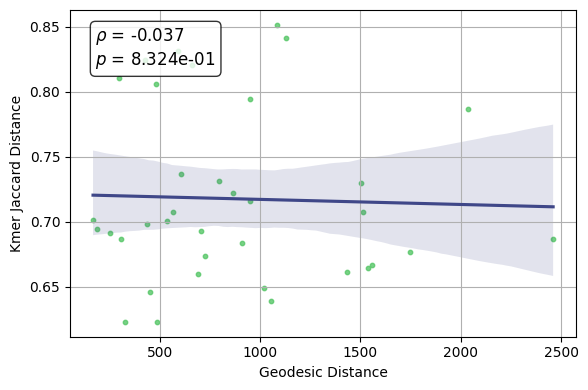

In [47]:
div_dir='soil_veraison21_cm5000'
kmer_dir='soil_veraison21_kmer_cm5000'


bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [48]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,-0.122402,0.476977
1,Jaccard,-0.187130,0.274462
2,Kmer Bray-Curtis,0.191763,0.262539
3,Kmer Jaccard,-0.036551,0.832391


<hr>

# SUBSET TO SINGLE YEAR 

# Diversity 

In [49]:
%%bash 

# subset to only harvest samples before fitting 
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
  --p-where "[Year]='2021'" \
  --o-filtered-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_table.qza

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_rep_seqs.qza

Saved FeatureTable[Frequency] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_table.qza
Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_rep_seqs.qza


In [53]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='soil_21_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

## Kmerizer 

In [44]:
!rm -r soil_veraison21_kmer_cm5000/

rm: das Entfernen von 'soil_veraison21_kmer_cm5000/' ist nicht möglich: No such file or directory


In [51]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/soil_21_filtered_table.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir soil_21_kmer_cm5000/

Saved FeatureTable[Frequency] to: soil_21_kmer_cm5000/rarefied_table.qza
Saved FeatureTable[Frequency] to: soil_21_kmer_cm5000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: soil_21_kmer_cm5000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: soil_21_kmer_cm5000/shannon_vector.qza
Saved DistanceMatrix to: soil_21_kmer_cm5000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: soil_21_kmer_cm5000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: soil_21_kmer_cm5000/jaccard_pcoa_results.qza
Saved PCoAResults to: soil_21_kmer_cm5000/bray_curtis_pcoa_results.qza
Saved Visualization to: soil_21_kmer_cm5000/scatterplot.qzv


## Mantel 

In [54]:
%%bash 

div_dir='soil_21_cm5000'
kmer_dir='soil_21_kmer_cm5000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported soil_21_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_21_cm5000/bray_curtis_distance_matrix
Exported soil_21_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_21_cm5000/jaccard_distance_matrix
Exported soil_21_kmer_cm5000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_21_kmer_cm5000/bray_curtis_distance_matrix
Exported soil_21_kmer_cm5000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory soil_21_kmer_cm5000/jaccard_distance_matrix


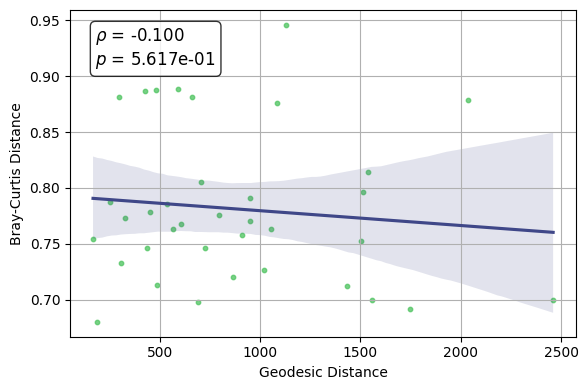

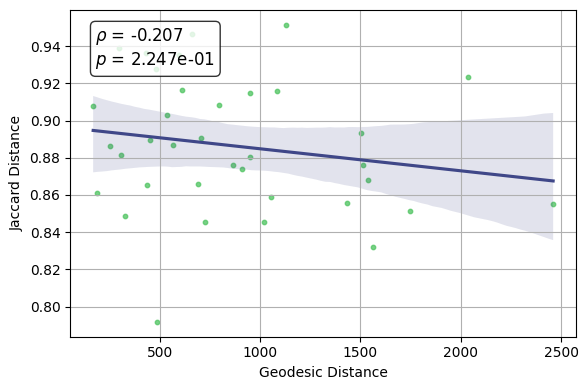

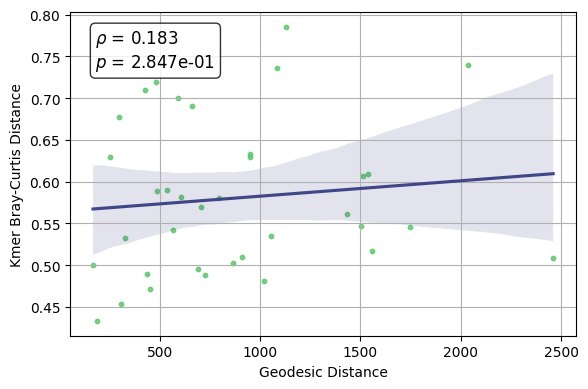

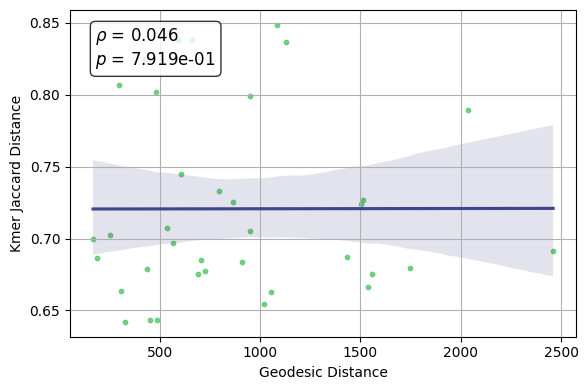

In [55]:
div_dir='soil_21_cm5000'
kmer_dir='soil_21_kmer_cm5000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [56]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,-0.100013,0.561673
1,Jaccard,-0.207465,0.224702
2,Kmer Bray-Curtis,0.183269,0.284664
3,Kmer Jaccard,0.045560,0.791897
